In [1]:
#Author: Wojciech Grzywocz, Silesian University of Technology
#Cancer prediction using classical machine learning techniques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("data/The_Cancer_data_1500_V2.csv")

In [2]:
print("Information about database:\n") 
print(df.info())

Information about database:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB
None


In [3]:
#Checking if there is no any missing data
print("Missing data:\n",df.isna().sum())

Missing data:
 Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64


In [4]:
print("First 5 rows:\n",df.head())

First 5 rows:
    Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
0   58       1  16.085313        0            1          8.146251   
1   71       0  30.828784        0            1          9.361630   
2   48       1  38.785084        0            2          5.135179   
3   34       0  30.040296        0            0          9.502792   
4   62       1  35.479721        0            0          5.356890   

   AlcoholIntake  CancerHistory  Diagnosis  
0       4.148219              1          1  
1       3.519683              0          0  
2       4.728368              0          1  
3       2.044636              0          0  
4       3.309849              0          1  


In [5]:
print("Database description:\n",df.describe())

Database description:
                Age       Gender          BMI      Smoking  GeneticRisk  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean     50.320000     0.490667    27.513321     0.269333     0.508667   
std      17.640968     0.500080     7.230012     0.443761     0.678895   
min      20.000000     0.000000    15.000291     0.000000     0.000000   
25%      35.000000     0.000000    21.483134     0.000000     0.000000   
50%      51.000000     0.000000    27.598494     0.000000     0.000000   
75%      66.000000     1.000000    33.850837     1.000000     1.000000   
max      80.000000     1.000000    39.958688     1.000000     2.000000   

       PhysicalActivity  AlcoholIntake  CancerHistory    Diagnosis  
count       1500.000000    1500.000000    1500.000000  1500.000000  
mean           4.897929       2.417987       0.144000     0.371333  
std            2.866162       1.419318       0.351207     0.483322  
min            0.002410       0.00

In [6]:
for col in df.columns:
    print(f'Unique values in "{col}" column:\n', df[col].unique())

Unique values in "Age" column:
 [58 71 48 34 62 27 80 40 77 38 42 30 43 72 55 59 22 41 21 63 49 57 79 52
 31 44 68 46 78 61 47 35 66 70 74 76 56 26 28 37 23 33 69 45 39 54 36 25
 73 53 29 50 67 64 60 20 24 32 51 75 65]
Unique values in "Gender" column:
 [1 0]
Unique values in "BMI" column:
 [16.08531332 30.82878439 38.78508356 ... 32.6138607  25.56821592
 23.6631042 ]
Unique values in "Smoking" column:
 [0 1]
Unique values in "GeneticRisk" column:
 [1 2 0]
Unique values in "PhysicalActivity" column:
 [8.14625056 9.36163042 5.13517867 ... 0.4668482  7.79531682 2.52586007]
Unique values in "AlcoholIntake" column:
 [4.14821903 3.51968334 4.72836769 ... 0.15010113 1.98613765 2.85660008]
Unique values in "CancerHistory" column:
 [1 0]
Unique values in "Diagnosis" column:
 [1 0]


In [7]:
print("Number of samples in each class:\n", df['Diagnosis'].value_counts())

Number of samples in each class:
 Diagnosis
0    943
1    557
Name: count, dtype: int64


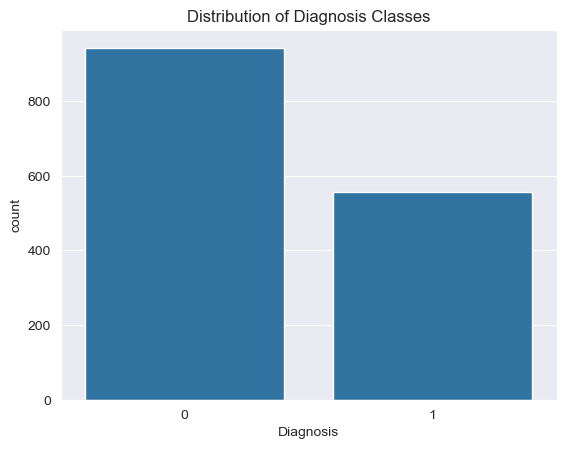

In [8]:
sns.countplot(data=df, x='Diagnosis')
plt.title("Distribution of Diagnosis Classes")
plt.show()

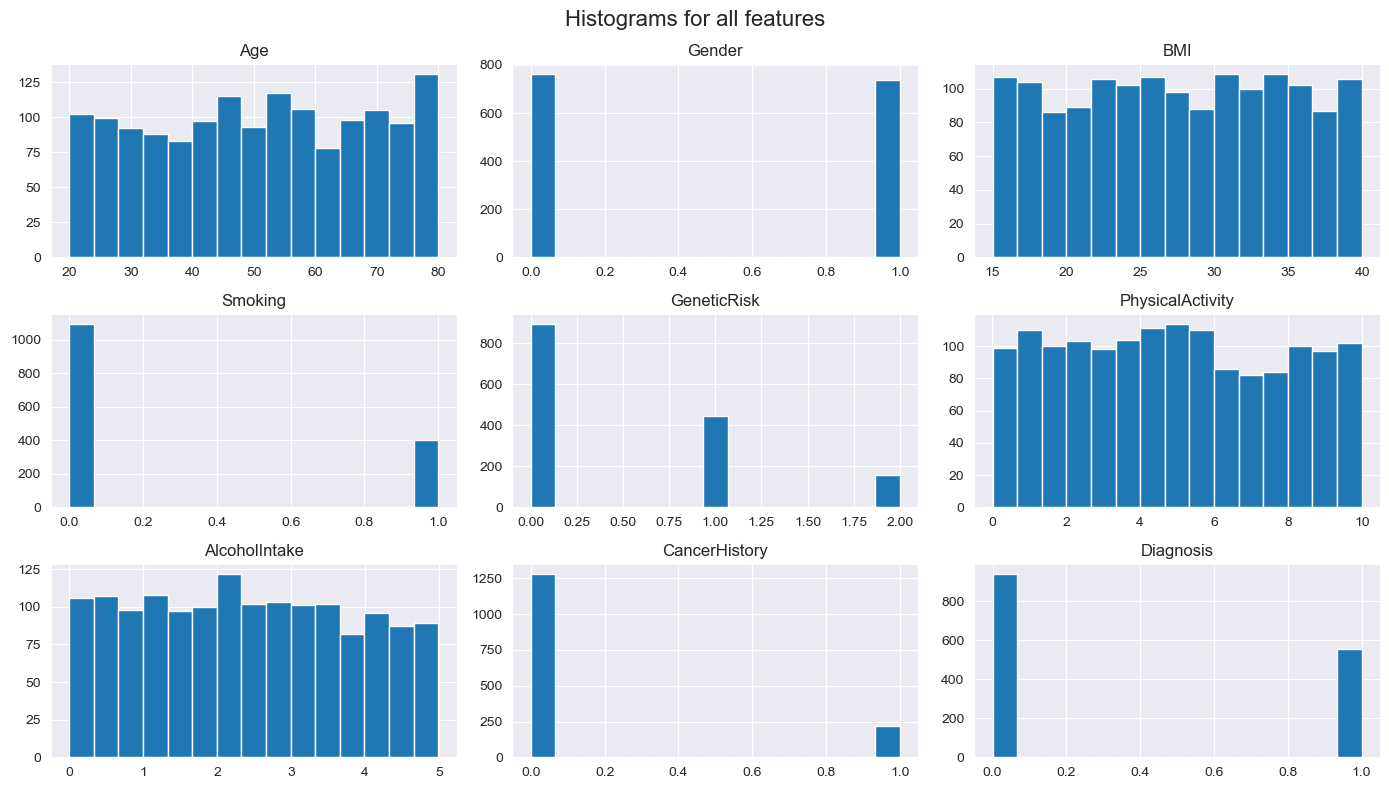

In [9]:
df.hist(figsize=(14, 8), bins=15)
plt.suptitle("Histograms for all features", fontsize=16)
plt.tight_layout()
plt.show()

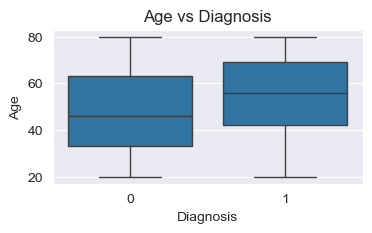

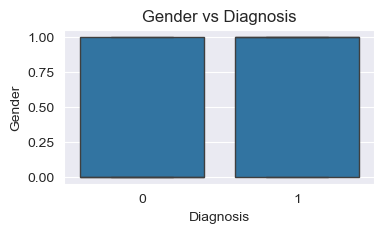

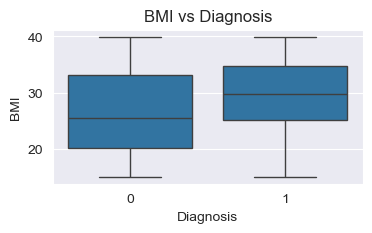

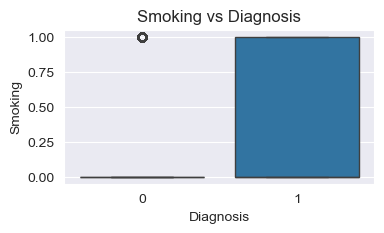

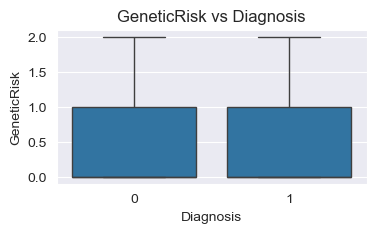

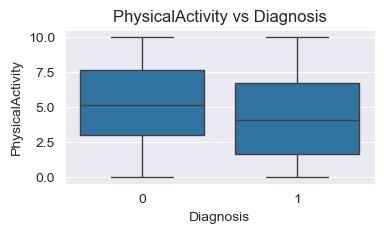

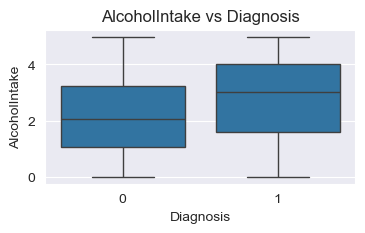

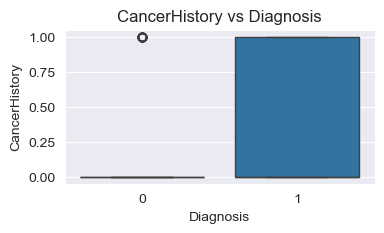

In [10]:
for col in df.columns:
    if col != 'Diagnosis':
        plt.figure(figsize=(4, 2))
        sns.boxplot(data=df, x='Diagnosis', y=col)
        plt.title(f"{col} vs Diagnosis")
        plt.show()

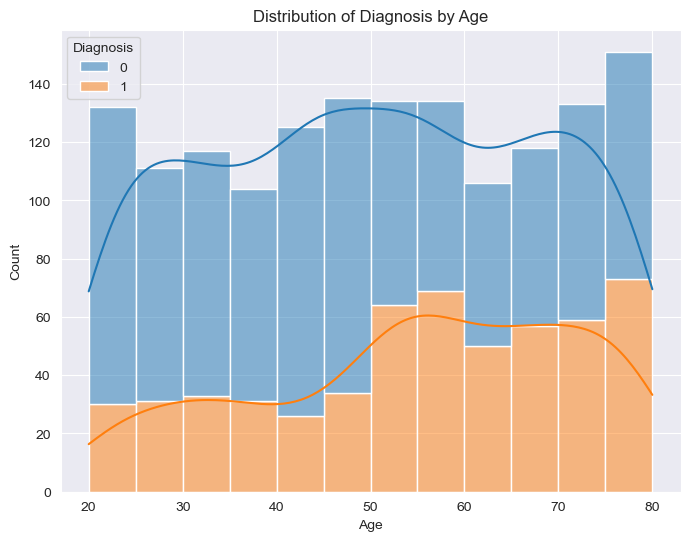

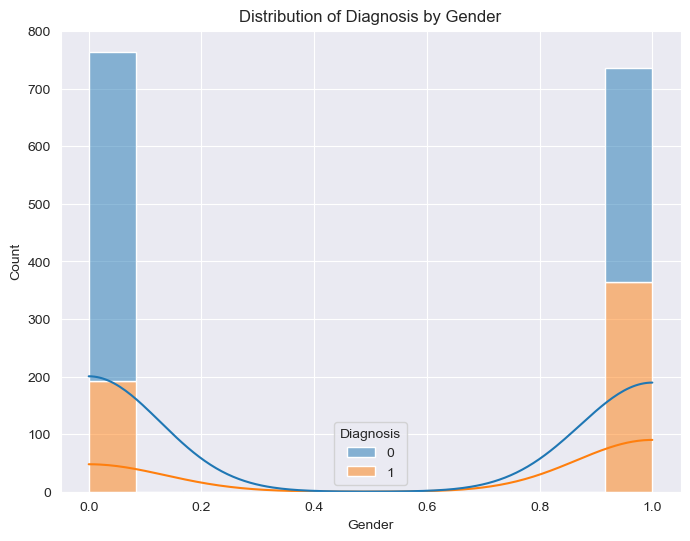

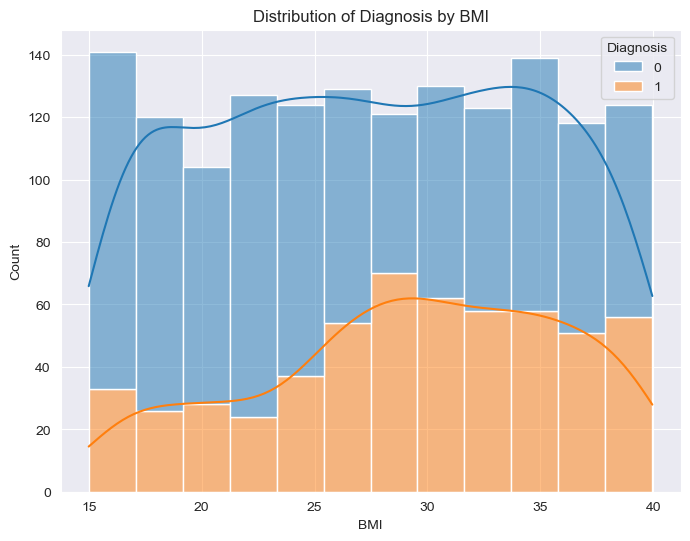

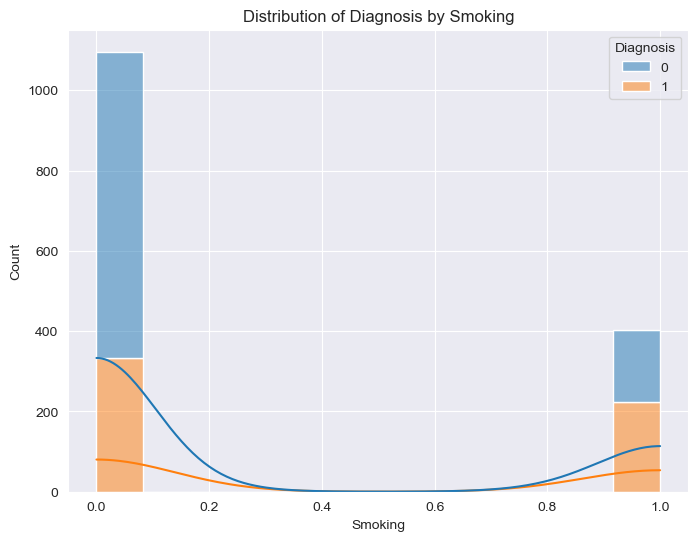

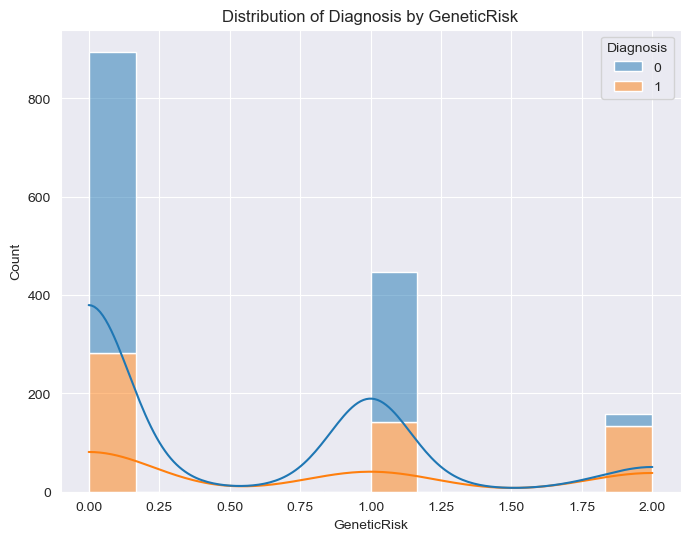

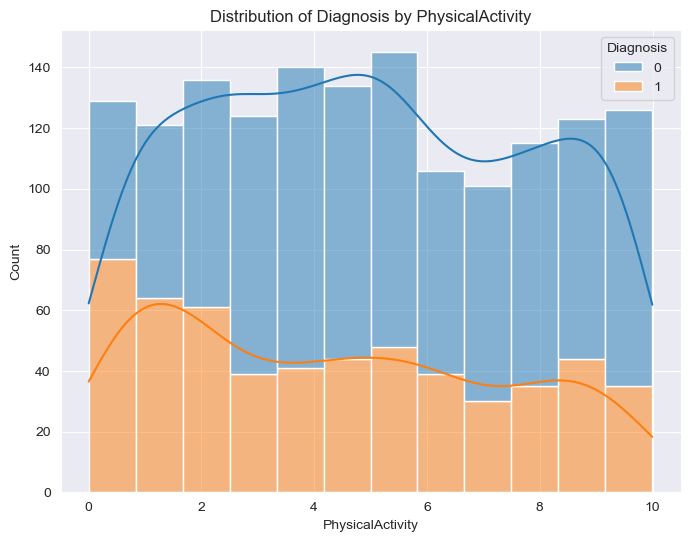

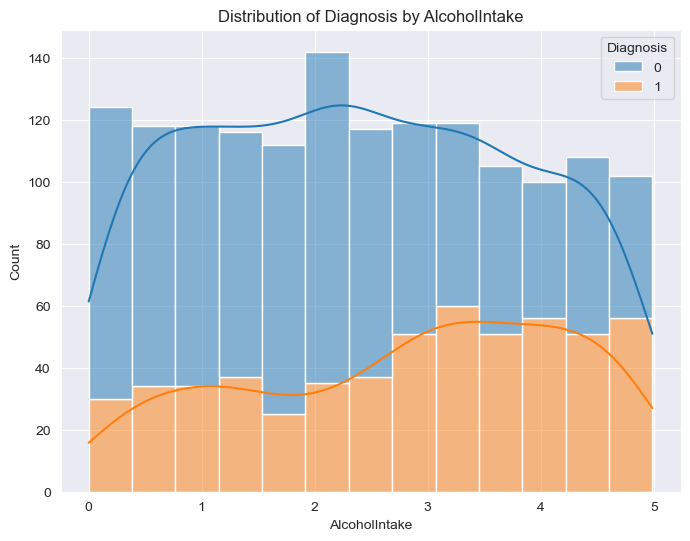

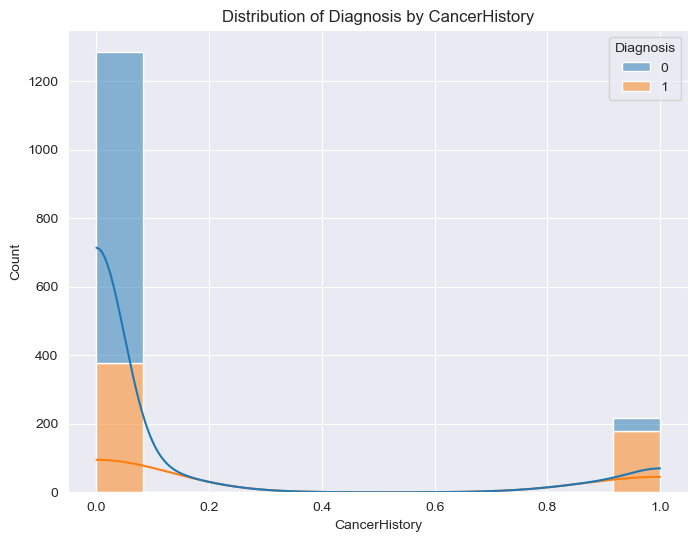

In [11]:
for col in df.columns:
    if col != 'Diagnosis':
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=col, hue='Diagnosis', multiple='stack', kde=True)
        plt.title(f'Distribution of Diagnosis by {col}')
        plt.xlabel(f'{col}')
        plt.ylabel('Count')
        plt.show()

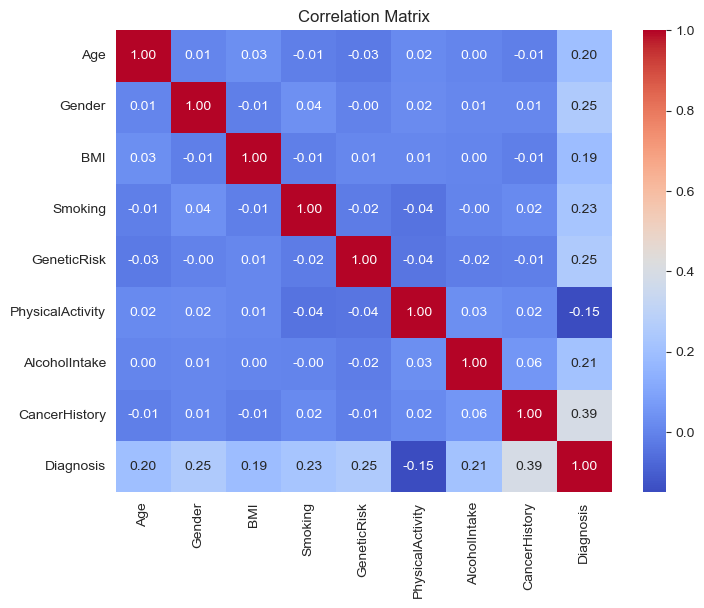

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


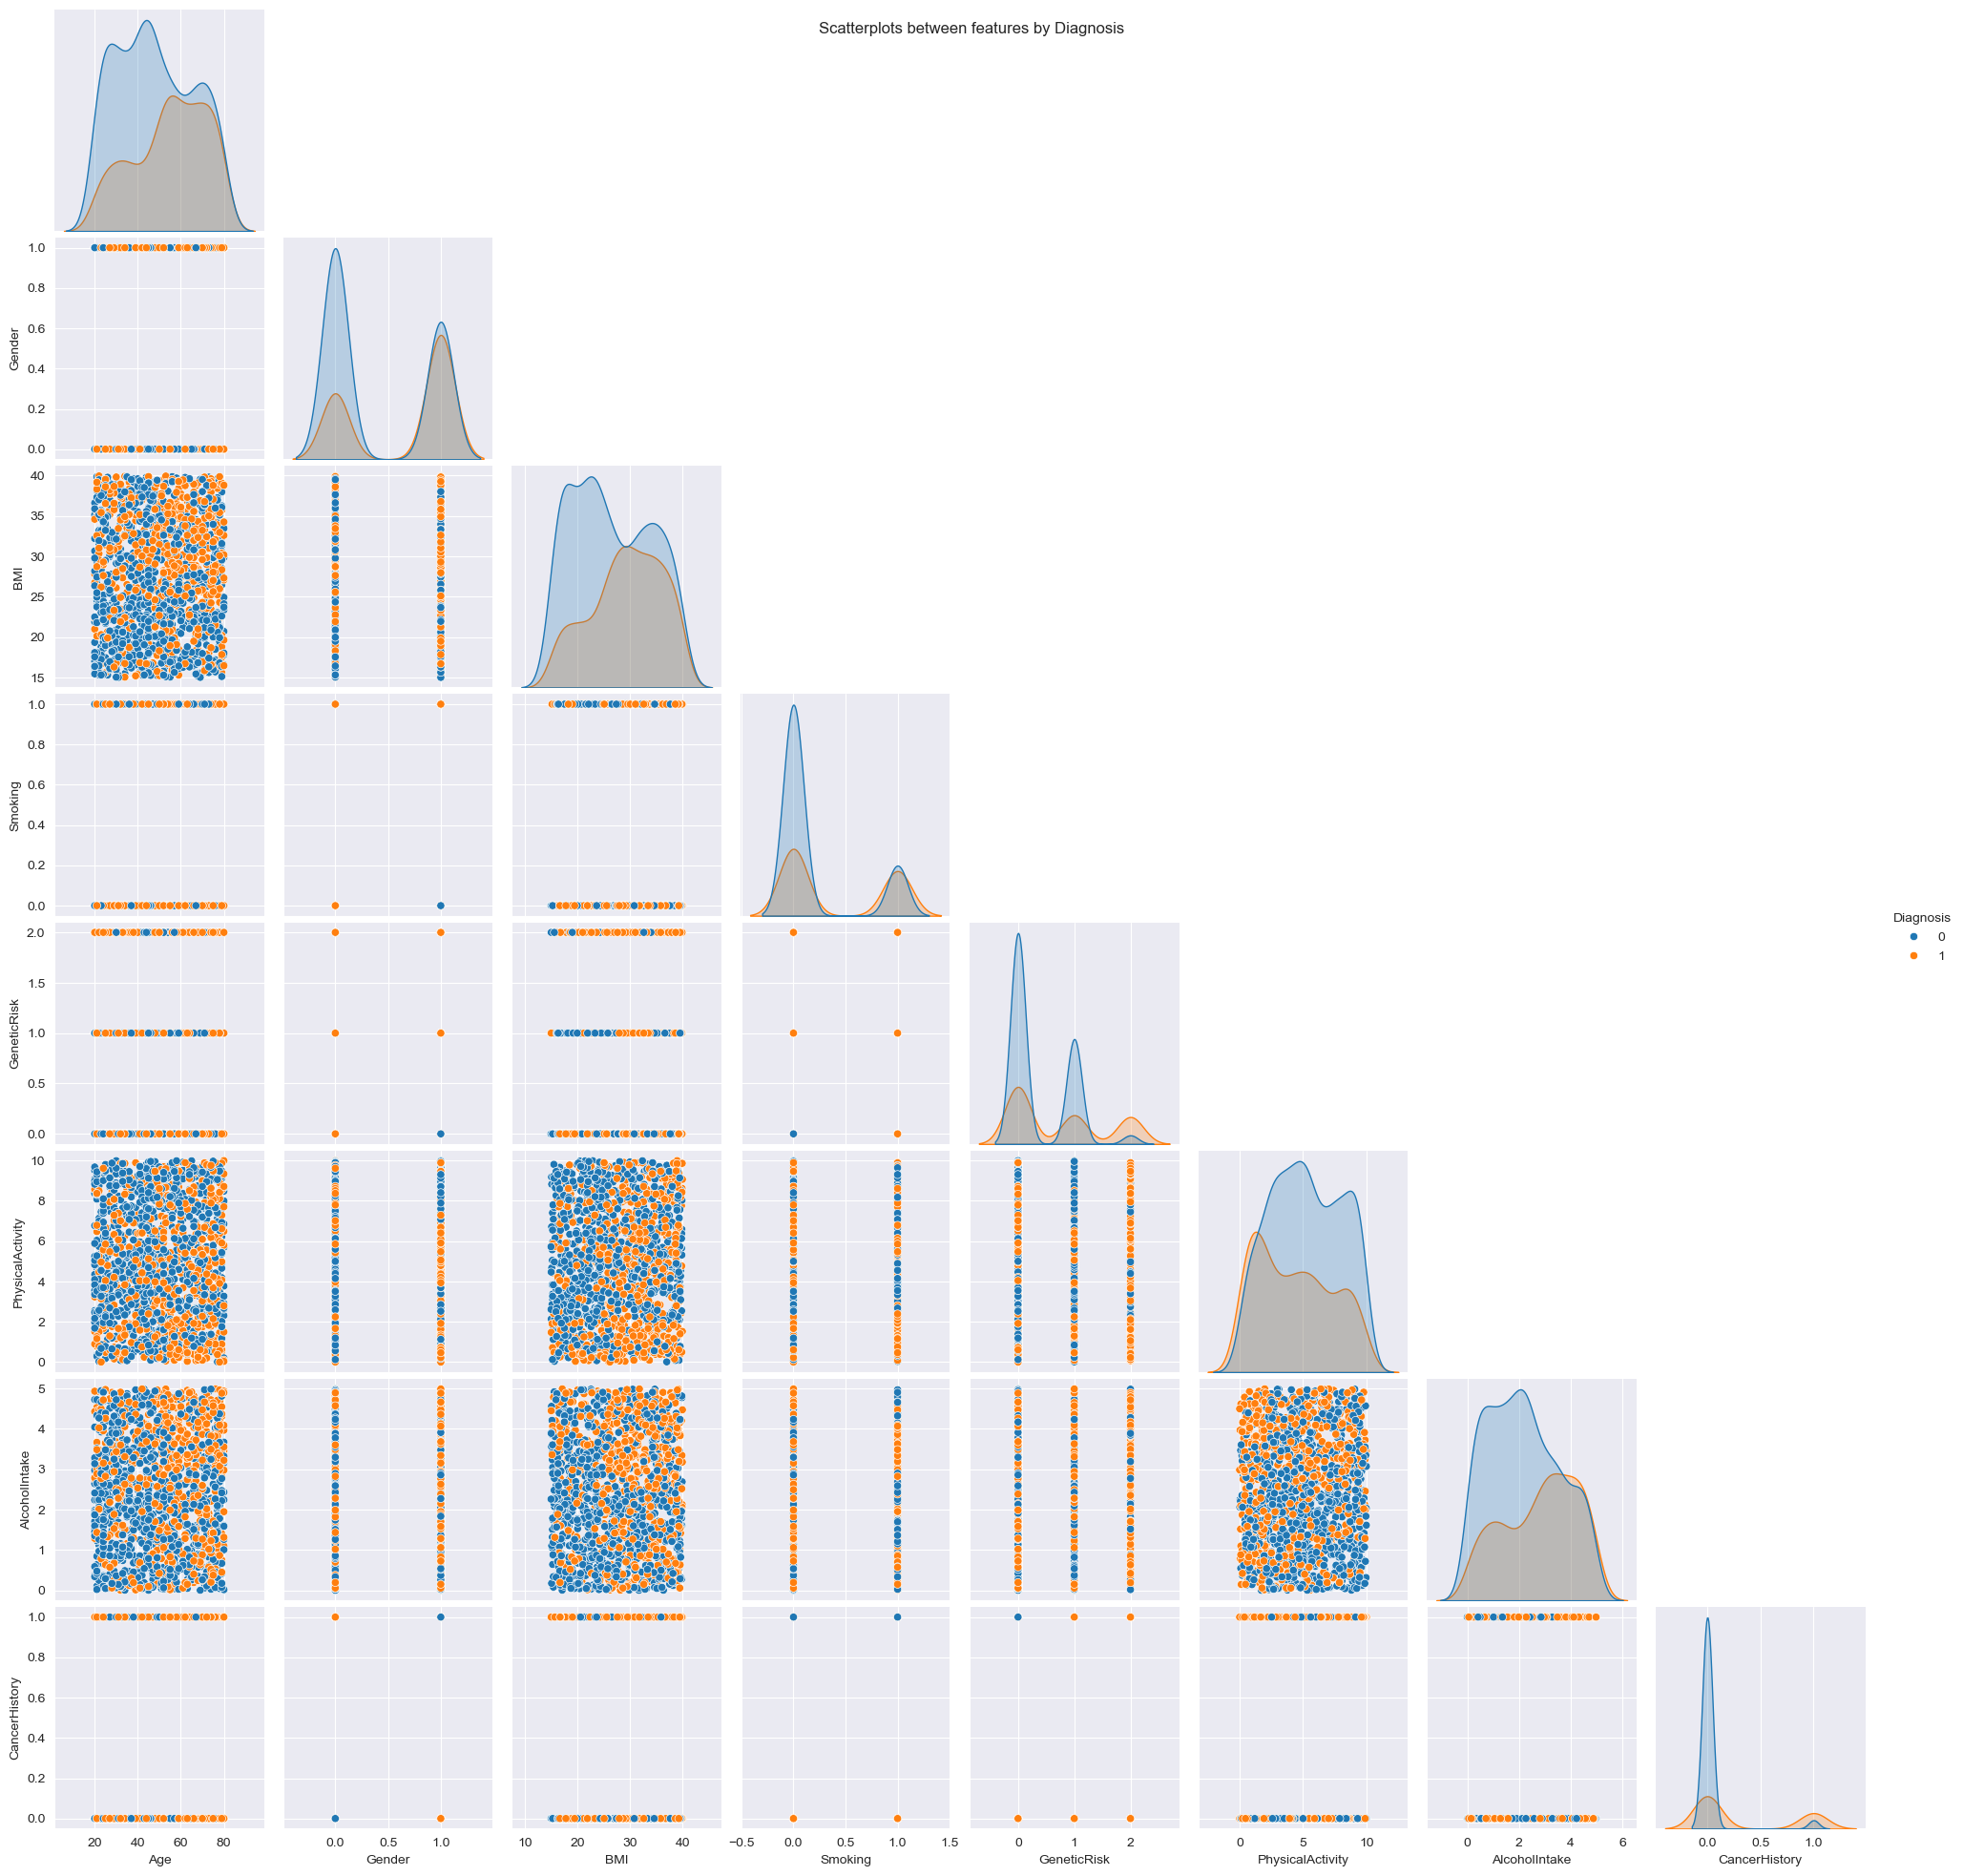

In [13]:
#Nothing important finally
sns.pairplot(df, hue="Diagnosis", corner=True)
plt.suptitle("Scatterplots between features by Diagnosis")
plt.show()

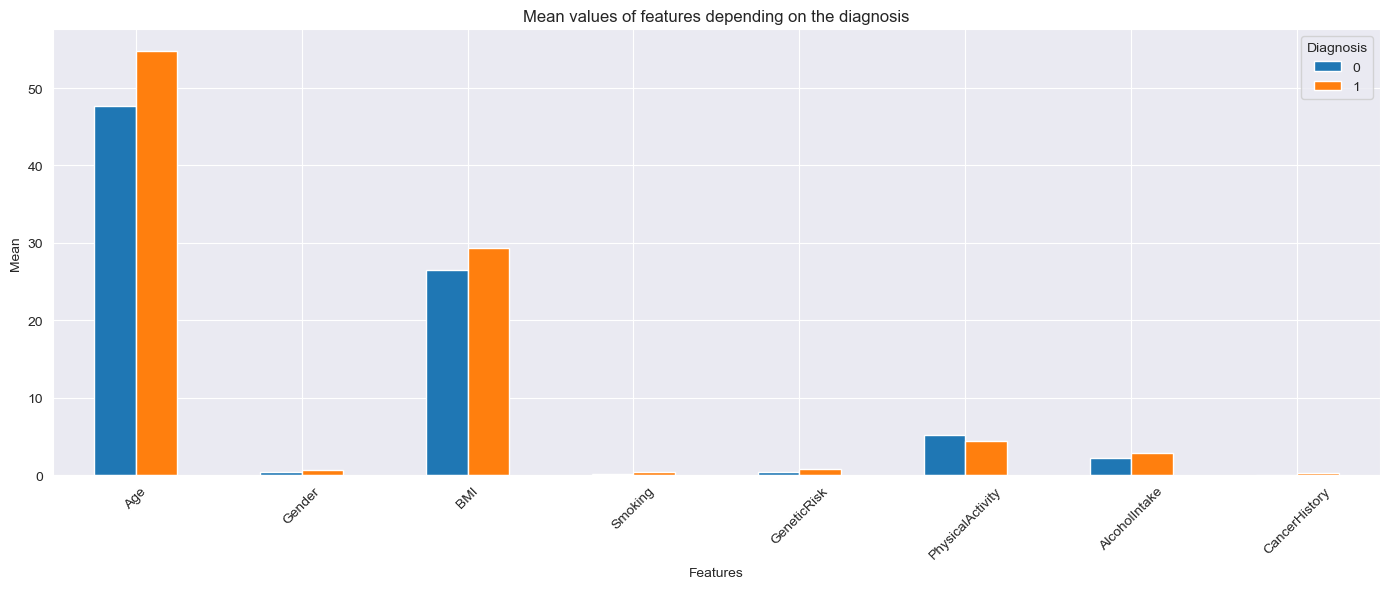

In [14]:
means = df.groupby("Diagnosis").mean()
means.T.plot(kind='bar', figsize=(14, 6))
plt.title("Mean values of features depending on the diagnosis")
plt.ylabel("Mean")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.legend(title="Diagnosis")
plt.tight_layout()
plt.show()

In [15]:
#Scaled split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_scaled = df.copy()
scaler = StandardScaler()
cols_to_scale = ['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']

df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

df_scaled = df_scaled.sample(frac=1, random_state=42).reset_index(drop=True)
Y_scaled = df_scaled['Diagnosis']
X_scaled = df_scaled.drop(columns=['Diagnosis'])

X_train_scaled,X_test_scaled,Y_train_scaled,Y_test_scaled = train_test_split(X_scaled,Y_scaled,test_size=0.3, random_state=42, stratify=Y_scaled)

print("Size of X_train_scaled:", X_train_scaled.shape)
print("Size of X_test_scaled:", X_test_scaled.shape)

Size of X_train_scaled: (1050, 8)
Size of X_test_scaled: (450, 8)


In [16]:
#Normal split
df_copy = df.copy()
df_copy = df_copy.sample(frac=1, random_state=42).reset_index(drop=True)
Y = df_copy['Diagnosis']
X = df_copy.drop(columns=['Diagnosis'])

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=42, stratify=Y)

print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)

Size of X_train: (1050, 8)
Size of X_test: (450, 8)


In [17]:
from sklearn.decomposition import PCA
pca_3_unscalled = PCA(n_components=3)
pca_6_unscalled = PCA(n_components=6)
pca_3_scalled = PCA(n_components=3)
pca_6_scalled = PCA(n_components=6)
X_train_pca_3 = pca_3_unscalled.fit_transform(X_train)
X_test_pca_3 = pca_3_unscalled.transform(X_test)
X_train_pca_6 = pca_6_unscalled.fit_transform(X_train)
X_test_pca_6 = pca_6_unscalled.transform(X_test)

X_train_scaled_pca_3 = pca_3_scalled.fit_transform(X_train_scaled)
X_test_scaled_pca_3 = pca_3_scalled.transform(X_test_scaled)
X_train_scaled_pca_6 = pca_6_scalled.fit_transform(X_train_scaled)
X_test_scaled_pca_6 = pca_6_scalled.transform(X_test_scaled)

#For checking
print(X_train.head())
df_pca_3 = pd.DataFrame(X_train_pca_3, columns=[f'PC{i+1}' for i in range(X_train_pca_3.shape[1])])
df_pca_6 = pd.DataFrame(X_train_pca_6, columns=[f'PC{i+1}' for i in range(X_train_pca_6.shape[1])])
print(df_pca_3.head())
print(df_pca_6.head())

      Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
42     34       0  16.725190        1            0          6.874369   
654    22       0  33.212267        0            1          6.736098   
929    63       0  32.373777        0            1          3.188173   
1302   49       1  39.400346        0            0          1.355169   
1114   42       0  22.598660        0            2          3.093686   

      AlcoholIntake  CancerHistory  
42         4.052165              1  
654        0.983443              0  
929        0.267173              0  
1302       4.141891              0  
1114       4.979012              0  
         PC1        PC2       PC3
0 -16.597284 -10.828010  2.181878
1 -28.430273   5.777339  1.850807
2  12.557277   4.493852 -1.721872
3  -1.368682  11.657498 -3.492608
4  -8.541047  -5.050893 -1.641081
         PC1        PC2       PC3       PC4       PC5       PC6
0 -16.597284 -10.828010  2.181878  1.625125 -0.502801 -0.509668
1 -28.430273 


----- KNN on Unscaled dataset -----

Best parameters found:  {'metric': 'canberra', 'n_neighbors': 4, 'weights': 'distance'}

Best cross-validation accuracy: 0.8128205128205128

TEST ACCURACY: 0.8622222222222222

Classification Report:

               precision    recall  f1-score   support

           0       0.88      0.90      0.89       283
           1       0.83      0.80      0.81       167

    accuracy                           0.86       450
   macro avg       0.85      0.85      0.85       450
weighted avg       0.86      0.86      0.86       450


Confusion Matrix:


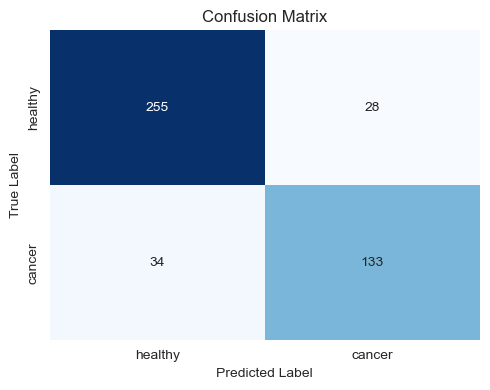


----- KNN on Scaled dataset -----

Best parameters found:  {'metric': 'canberra', 'n_neighbors': 3, 'weights': 'distance'}

Best cross-validation accuracy: 0.741025641025641

TEST ACCURACY: 0.86

Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.93      0.89       283
           1       0.87      0.74      0.80       167

    accuracy                           0.86       450
   macro avg       0.86      0.83      0.84       450
weighted avg       0.86      0.86      0.86       450


Confusion Matrix:


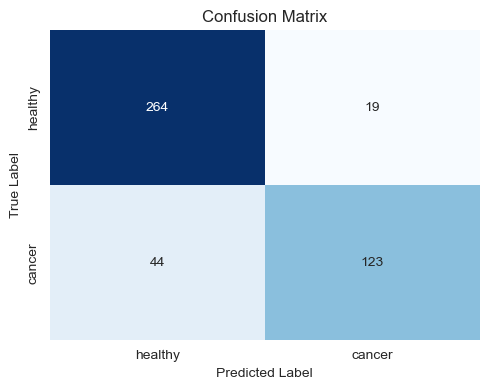


----- KNN on PCA_3 dataset -----

Best parameters found:  {'metric': 'canberra', 'n_neighbors': 5, 'weights': 'distance'}

Best cross-validation accuracy: 0.47948717948717956

TEST ACCURACY: 0.6466666666666666

Classification Report:

               precision    recall  f1-score   support

           0       0.69      0.81      0.74       283
           1       0.53      0.38      0.44       167

    accuracy                           0.65       450
   macro avg       0.61      0.59      0.59       450
weighted avg       0.63      0.65      0.63       450


Confusion Matrix:


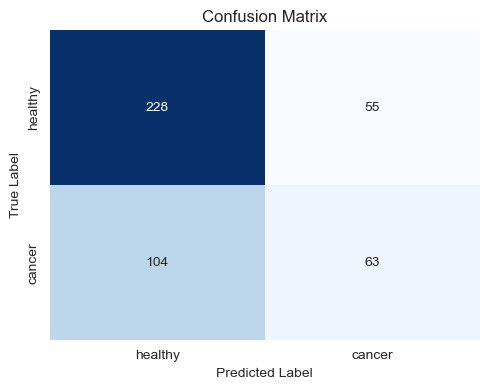


----- KNN on Scaled_PCA_3 dataset -----

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

Best cross-validation accuracy: 0.4435897435897436

TEST ACCURACY: 0.5844444444444444

Classification Report:

               precision    recall  f1-score   support

           0       0.66      0.69      0.68       283
           1       0.44      0.40      0.42       167

    accuracy                           0.58       450
   macro avg       0.55      0.55      0.55       450
weighted avg       0.58      0.58      0.58       450


Confusion Matrix:


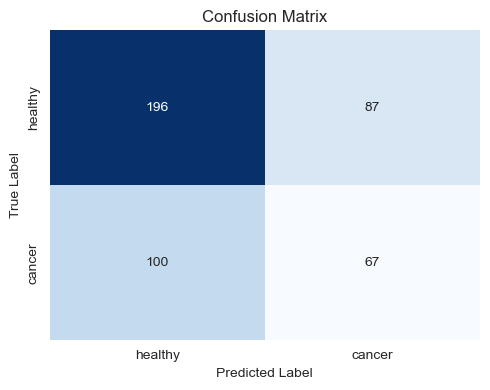


----- KNN on PCA_6 dataset -----

Best parameters found:  {'metric': 'canberra', 'n_neighbors': 4, 'weights': 'distance'}

Best cross-validation accuracy: 0.5871794871794872

TEST ACCURACY: 0.7488888888888889

Classification Report:

               precision    recall  f1-score   support

           0       0.77      0.85      0.81       283
           1       0.69      0.58      0.63       167

    accuracy                           0.75       450
   macro avg       0.73      0.71      0.72       450
weighted avg       0.74      0.75      0.74       450


Confusion Matrix:


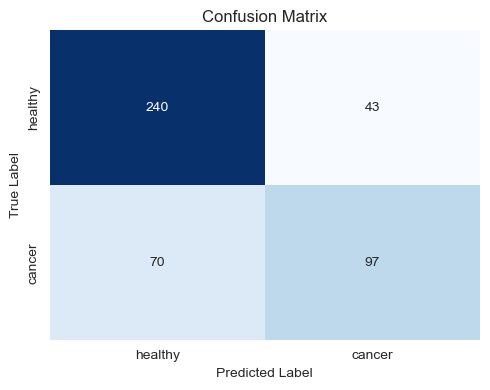


----- KNN on Scaled_PCA_6 dataset -----

Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}

Best cross-validation accuracy: 0.558974358974359

TEST ACCURACY: 0.7355555555555555

Classification Report:

               precision    recall  f1-score   support

           0       0.75      0.86      0.80       283
           1       0.69      0.52      0.59       167

    accuracy                           0.74       450
   macro avg       0.72      0.69      0.70       450
weighted avg       0.73      0.74      0.73       450


Confusion Matrix:


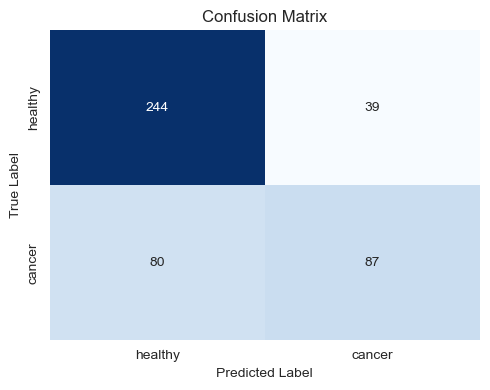

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
datasets = [
    ('Unscaled', X_train, X_test, Y_train, Y_test),
    ('Scaled', X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled),
    ('PCA_3', X_train_pca_3, X_test_pca_3, Y_train, Y_test),
    ('Scaled_PCA_3', X_train_scaled_pca_3, X_test_scaled_pca_3, Y_train_scaled, Y_test_scaled),
    ('PCA_6', X_train_pca_6, X_test_pca_6, Y_train, Y_test),
    ('Scaled_PCA_6', X_train_scaled_pca_6, X_test_scaled_pca_6, Y_train_scaled, Y_test_scaled)
]
param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan','canberra','minkowski']
}

for name, X_tr, X_te, Y_tr, Y_te in datasets:
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='recall')
    grid_search.fit(X_tr, Y_tr)
    
    print(f'\n----- KNN on {name} dataset -----\n')
    print("Best parameters found: ", grid_search.best_params_)
    print("\nBest cross-validation accuracy:", grid_search.best_score_) 
    
    best_knn = grid_search.best_estimator_
    Y_pred = best_knn.predict(X_te)
    
    print("\nTEST ACCURACY:", accuracy_score(Y_te, Y_pred))
    print('\nClassification Report:')
    print("\n",classification_report(Y_te, Y_pred))
    print('\nConfusion Matrix:')
    conf_mat = confusion_matrix(Y_te, Y_pred)
    class_names = ['healthy', 'cancer']
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()


Accuracy:  0.8888888888888888
Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       283
           1       0.86      0.84      0.85       167

    accuracy                           0.89       450
   macro avg       0.88      0.88      0.88       450
weighted avg       0.89      0.89      0.89       450


Confusion Matrix:


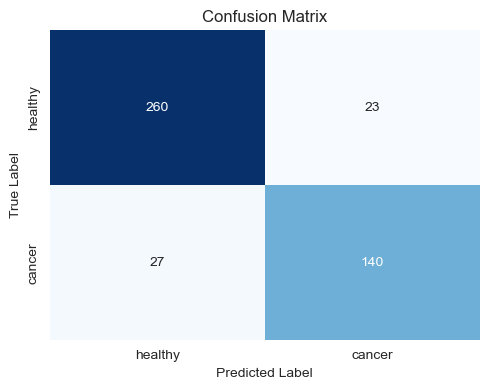

In [19]:
#Manual testing on different k-neighbours
classical_knn= KNeighborsClassifier(n_neighbors=9, weights='distance', metric='canberra')
classical_knn.fit(X_train, Y_train)

Y_predict = classical_knn.predict(X_test)
accuracy = accuracy_score(Y_test, Y_predict)
print("Accuracy: ",accuracy)
print("Classification Report:\n")
print(classification_report(Y_test, Y_predict))
print('\nConfusion Matrix:')
conf_mat = confusion_matrix(Y_test, Y_predict)
class_names = ['healthy', 'cancer']
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [20]:
# Best result before, on k=3 , now, on k=9, we have better accuracy and recall for cancer

#Hand-made KNN:
import math
class KNNClass:
    def metric(self,a, b):
        sum=0
        if len(a) == len(b):
            
            #Canberra metric
            for i in range(len(a)):
                denom = math.fabs(a[i]) + math.fabs(b[i])
                if denom != 0:
                    sum += math.fabs(a[i] - b[i]) / denom
                else:
                    sum += 1
            
            return sum        
        else:
            print("Different dimensions")
            
    def knn(self,X_train, Y_train, X_test, k):
        Y_prediction = []
        X_train_np = X_train.to_numpy()
        Y_train_np = Y_train.to_numpy()
        X_test_np = X_test.to_numpy()

        for X_test_vector in X_test_np:
            distances = []

            for i in range(len(X_train_np)):
                dist = self.metric(X_test_vector, X_train_np[i])
                distances.append((dist, Y_train_np[i]))

            distances.sort(key=lambda x: x[0])
            k_neighbors = distances[:k]         #list of tuples
        
            labels = [neighbor[1] for neighbor in k_neighbors]
            
            control=set(labels)
            most_common=["",0]
            for item in control:
                if(labels.count(item) > most_common[1]):
                    most_common=[item, labels.count(item)]
            Y_prediction.append(most_common[0])
        
        return pd.Series(Y_prediction)

FOR K=15
Accuracy:  0.7822222222222223
Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.73      0.81       283
           1       0.66      0.87      0.75       167

    accuracy                           0.78       450
   macro avg       0.78      0.80      0.78       450
weighted avg       0.81      0.78      0.79       450


Confusion Matrix:


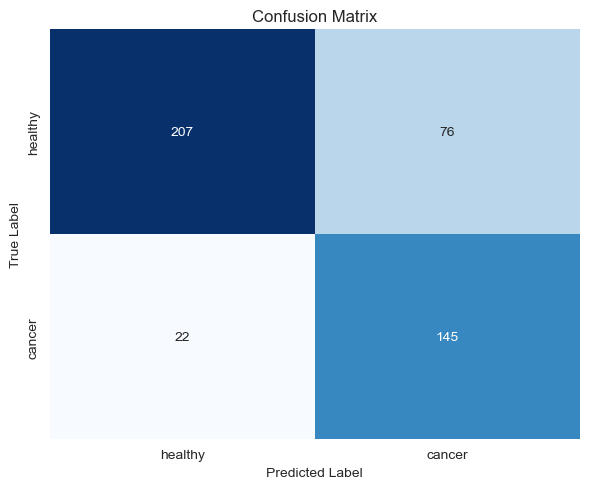

FOR K=16
Accuracy:  0.7911111111111111
Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       283
           1       0.68      0.83      0.75       167

    accuracy                           0.79       450
   macro avg       0.78      0.80      0.78       450
weighted avg       0.81      0.79      0.79       450


Confusion Matrix:


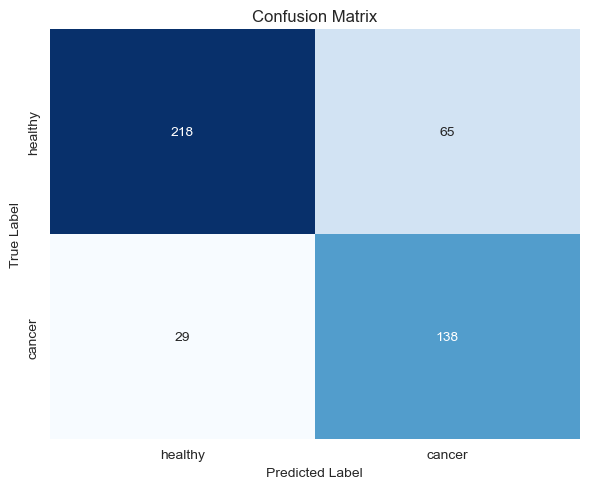

FOR K=17
Accuracy:  0.7866666666666666
Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       283
           1       0.66      0.87      0.75       167

    accuracy                           0.79       450
   macro avg       0.78      0.80      0.78       450
weighted avg       0.81      0.79      0.79       450


Confusion Matrix:


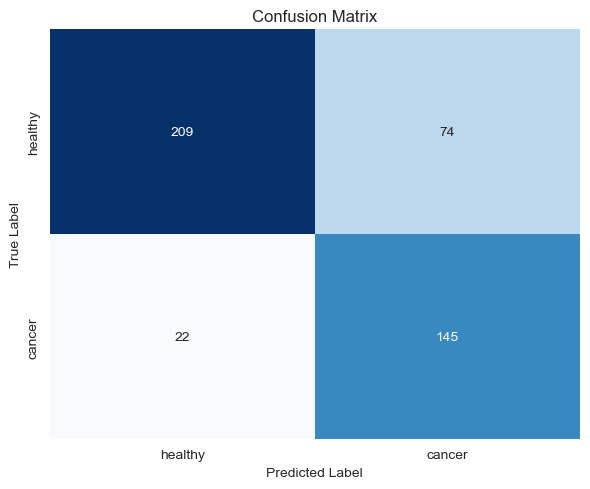

FOR K=18
Accuracy:  0.7955555555555556
Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       283
           1       0.68      0.84      0.75       167

    accuracy                           0.80       450
   macro avg       0.79      0.80      0.79       450
weighted avg       0.81      0.80      0.80       450


Confusion Matrix:


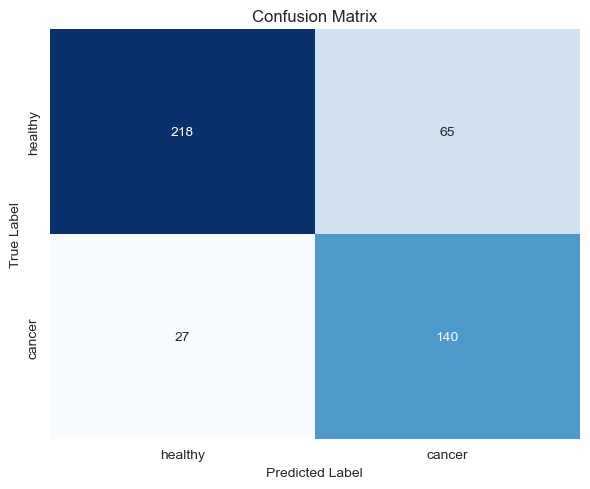

FOR K=19
Accuracy:  0.7822222222222223
Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       283
           1       0.66      0.86      0.74       167

    accuracy                           0.78       450
   macro avg       0.78      0.80      0.78       450
weighted avg       0.81      0.78      0.79       450


Confusion Matrix:


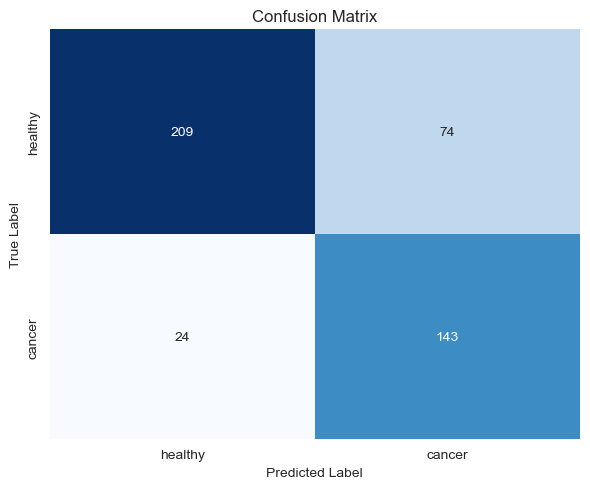

FOR K=20
Accuracy:  0.7911111111111111
Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       283
           1       0.68      0.83      0.75       167

    accuracy                           0.79       450
   macro avg       0.78      0.80      0.78       450
weighted avg       0.81      0.79      0.79       450


Confusion Matrix:


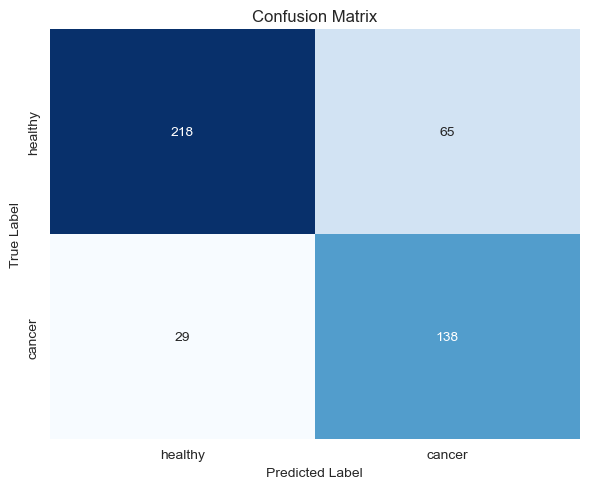

FOR K=21
Accuracy:  0.7777777777777778
Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.73      0.81       283
           1       0.65      0.85      0.74       167

    accuracy                           0.78       450
   macro avg       0.77      0.79      0.77       450
weighted avg       0.80      0.78      0.78       450


Confusion Matrix:


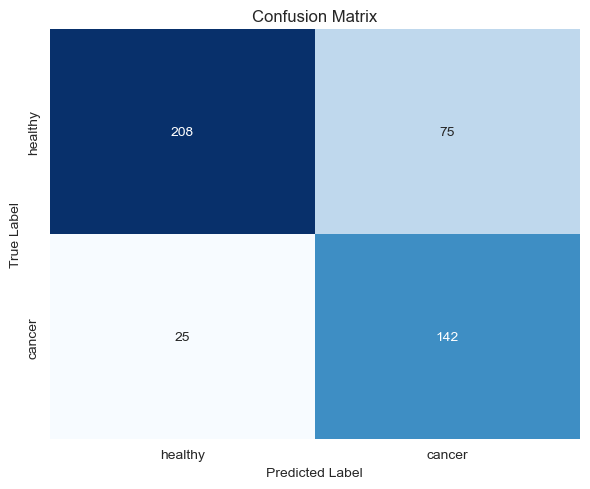

In [21]:
#Testing my_knn on different k-neighbours (first on scaled set)
my_knn = KNNClass()
for neighbours in range(15,22):    #best range i found
    Y_pred_handmade = my_knn.knn(X_train_scaled, Y_train_scaled, X_test_scaled, k=neighbours)
    accuracy=accuracy_score(Y_test_scaled, Y_pred_handmade)
    print(f"FOR K={neighbours}")
    print("Accuracy: ",accuracy)
    print("Classification Report:\n")
    print(classification_report(Y_test_scaled, Y_pred_handmade))
    print('\nConfusion Matrix:')
    conf_mat = confusion_matrix(Y_test_scaled, Y_pred_handmade)
    class_names = ['healthy', 'cancer']
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

FOR K=15
Accuracy:  0.7733333333333333
Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.69      0.79       283
           1       0.63      0.92      0.75       167

    accuracy                           0.77       450
   macro avg       0.79      0.80      0.77       450
weighted avg       0.82      0.77      0.78       450


Confusion Matrix:


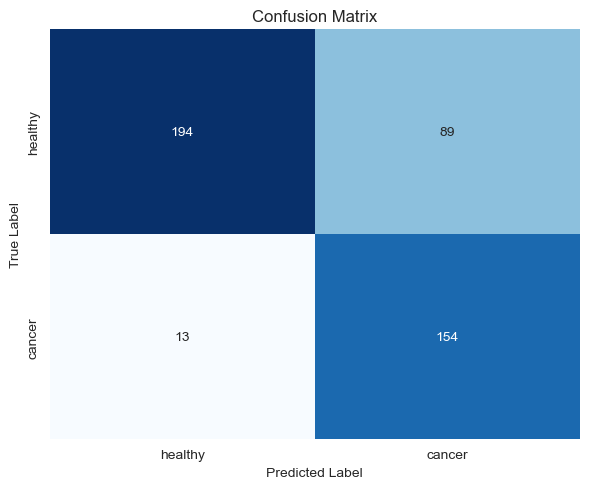

FOR K=16
Accuracy:  0.8066666666666666
Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       283
           1       0.68      0.92      0.78       167

    accuracy                           0.81       450
   macro avg       0.81      0.83      0.80       450
weighted avg       0.84      0.81      0.81       450


Confusion Matrix:


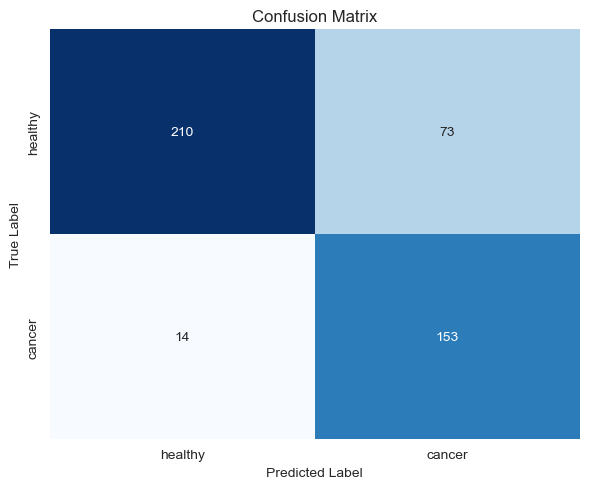

FOR K=17
Accuracy:  0.7777777777777778
Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.70      0.80       283
           1       0.64      0.92      0.75       167

    accuracy                           0.78       450
   macro avg       0.79      0.81      0.78       450
weighted avg       0.82      0.78      0.78       450


Confusion Matrix:


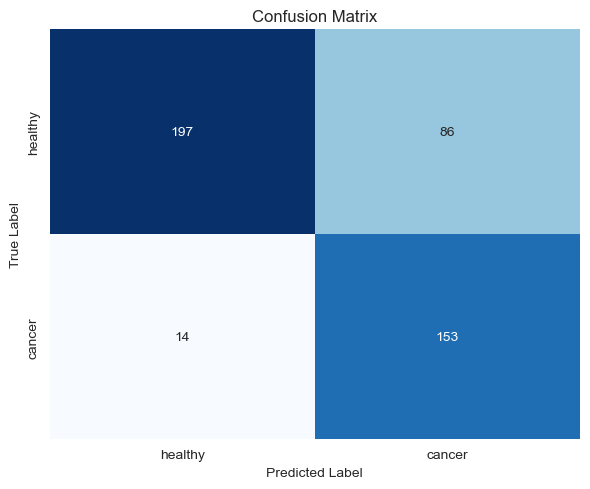

FOR K=18
Accuracy:  0.7955555555555556
Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.73      0.82       283
           1       0.66      0.91      0.77       167

    accuracy                           0.80       450
   macro avg       0.80      0.82      0.79       450
weighted avg       0.83      0.80      0.80       450


Confusion Matrix:


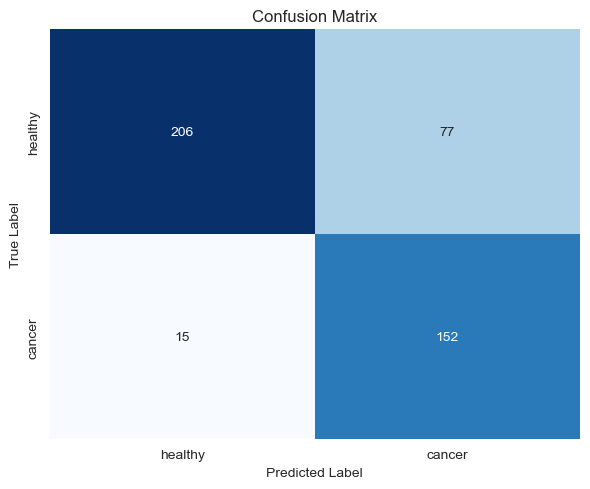

FOR K=19
Accuracy:  0.7822222222222223
Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.69      0.80       283
           1       0.64      0.93      0.76       167

    accuracy                           0.78       450
   macro avg       0.79      0.81      0.78       450
weighted avg       0.83      0.78      0.79       450


Confusion Matrix:


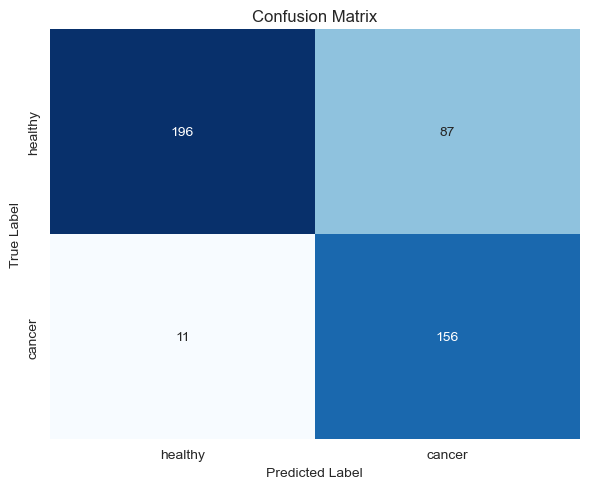

FOR K=20
Accuracy:  0.7911111111111111
Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.72      0.81       283
           1       0.66      0.92      0.77       167

    accuracy                           0.79       450
   macro avg       0.80      0.82      0.79       450
weighted avg       0.83      0.79      0.79       450


Confusion Matrix:


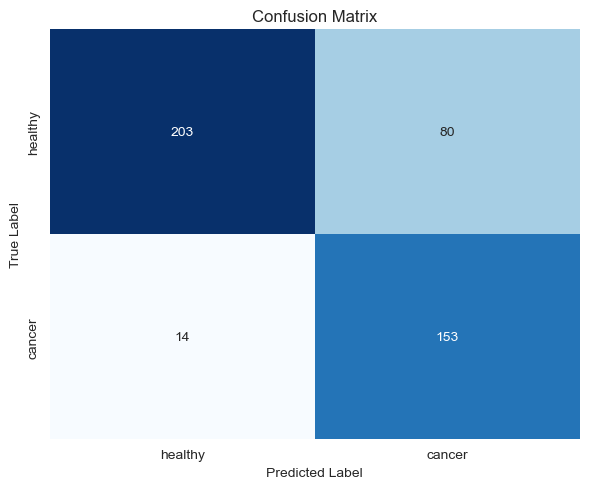

FOR K=21
Accuracy:  0.7844444444444445
Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.70      0.80       283
           1       0.64      0.93      0.76       167

    accuracy                           0.78       450
   macro avg       0.80      0.82      0.78       450
weighted avg       0.83      0.78      0.79       450


Confusion Matrix:


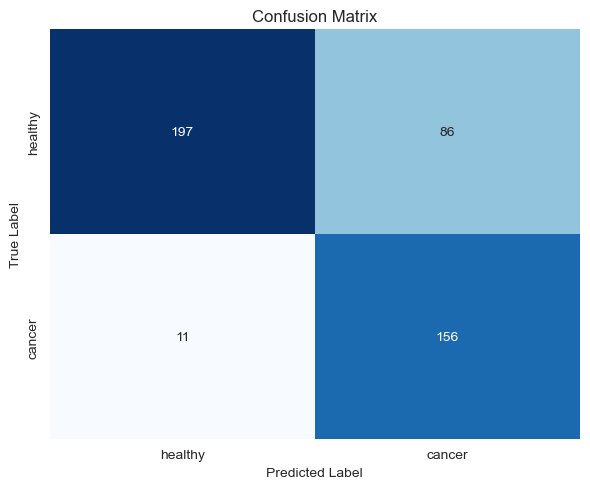

In [22]:
#Testing my_knn on different k-neighbours (on unscaled set because before we had the best result on unscaled set)
my_knn = KNNClass()
for neighbours in range(15,22):   #best range i found   
    Y_pred_handmade = my_knn.knn(X_train, Y_train, X_test, k=neighbours)
    accuracy=accuracy_score(Y_test, Y_pred_handmade)
    print(f"FOR K={neighbours}")
    print("Accuracy: ",accuracy)
    print("Classification Report:\n")
    print(classification_report(Y_test, Y_pred_handmade))
    print('\nConfusion Matrix:')
    conf_mat = confusion_matrix(Y_test, Y_pred_handmade)
    class_names = ['healthy', 'cancer']
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

In [23]:
#Best result if in metric: sum += 1 in case 0-division and for k_neighbours=21 for unscaled set (if we consider recall for cancer) (rec=0,93 acc=0,78)
#Best optimized model in case of accuracy and recall is k=16 on unscaled set (rec=0,92 acc=0,81)
#On scaled set best result was at k=17, recall for cancer=0,87 and acc=0,79 (worse than on unscaled set)

-----NAIVE BAYES, DATASET:  Unscaled

TEST ACCURACY: 0.8577777777777778

Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.97      0.90       283
           1       0.93      0.66      0.78       167

    accuracy                           0.86       450
   macro avg       0.88      0.82      0.84       450
weighted avg       0.87      0.86      0.85       450


Confusion Matrix:


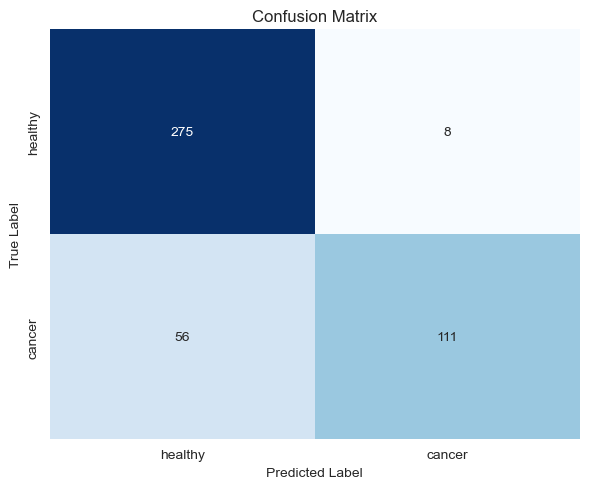

-----NAIVE BAYES, DATASET:  Scaled

TEST ACCURACY: 0.8577777777777778

Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.97      0.90       283
           1       0.93      0.66      0.78       167

    accuracy                           0.86       450
   macro avg       0.88      0.82      0.84       450
weighted avg       0.87      0.86      0.85       450


Confusion Matrix:


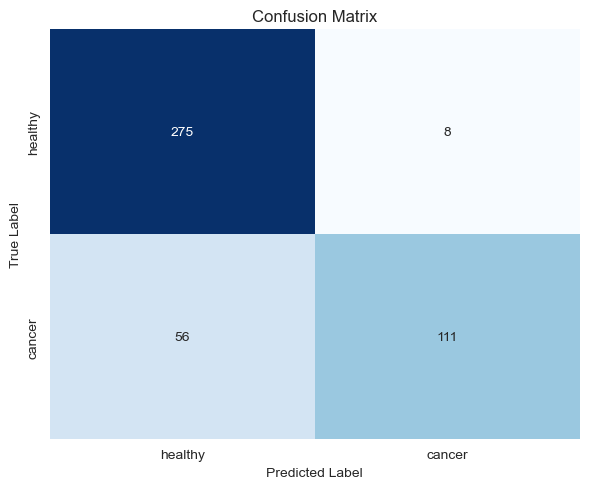

-----NAIVE BAYES, DATASET:  PCA_3

TEST ACCURACY: 0.6622222222222223

Classification Report:

               precision    recall  f1-score   support

           0       0.68      0.88      0.77       283
           1       0.59      0.29      0.39       167

    accuracy                           0.66       450
   macro avg       0.63      0.59      0.58       450
weighted avg       0.65      0.66      0.63       450


Confusion Matrix:


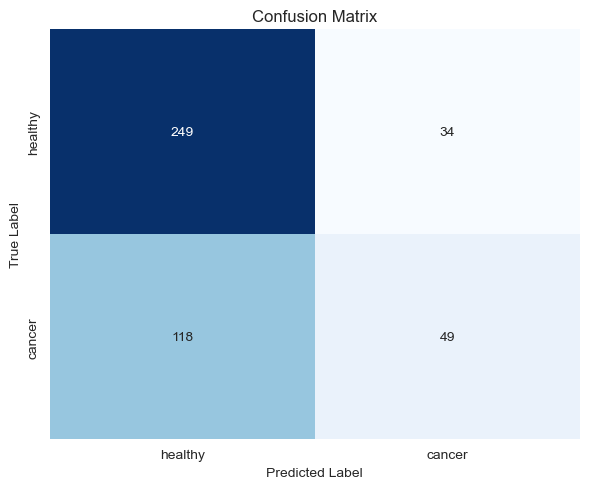

-----NAIVE BAYES, DATASET:  Scaled_PCA_3

TEST ACCURACY: 0.6555555555555556

Classification Report:

               precision    recall  f1-score   support

           0       0.67      0.89      0.76       283
           1       0.58      0.26      0.36       167

    accuracy                           0.66       450
   macro avg       0.63      0.57      0.56       450
weighted avg       0.64      0.66      0.61       450


Confusion Matrix:


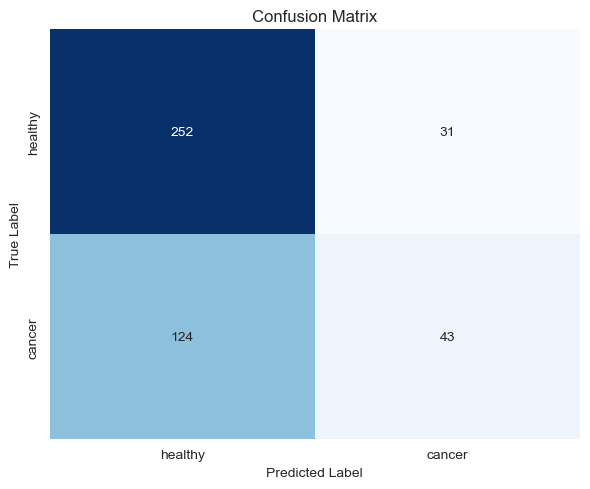

-----NAIVE BAYES, DATASET:  PCA_6

TEST ACCURACY: 0.7688888888888888

Classification Report:

               precision    recall  f1-score   support

           0       0.77      0.91      0.83       283
           1       0.77      0.53      0.63       167

    accuracy                           0.77       450
   macro avg       0.77      0.72      0.73       450
weighted avg       0.77      0.77      0.76       450


Confusion Matrix:


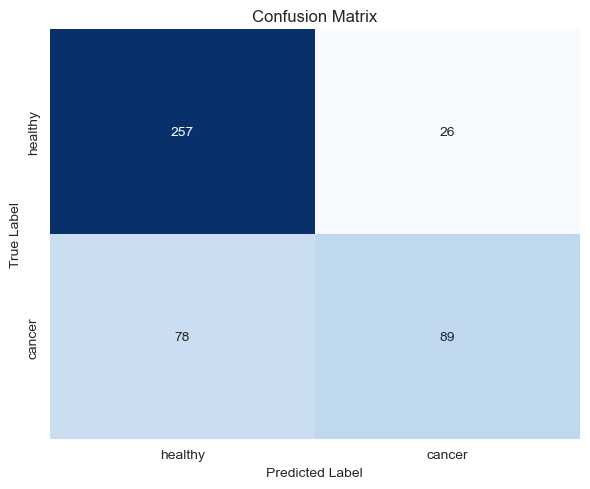

-----NAIVE BAYES, DATASET:  Scaled_PCA_6

TEST ACCURACY: 0.7733333333333333

Classification Report:

               precision    recall  f1-score   support

           0       0.77      0.92      0.84       283
           1       0.79      0.53      0.64       167

    accuracy                           0.77       450
   macro avg       0.78      0.72      0.74       450
weighted avg       0.78      0.77      0.76       450


Confusion Matrix:


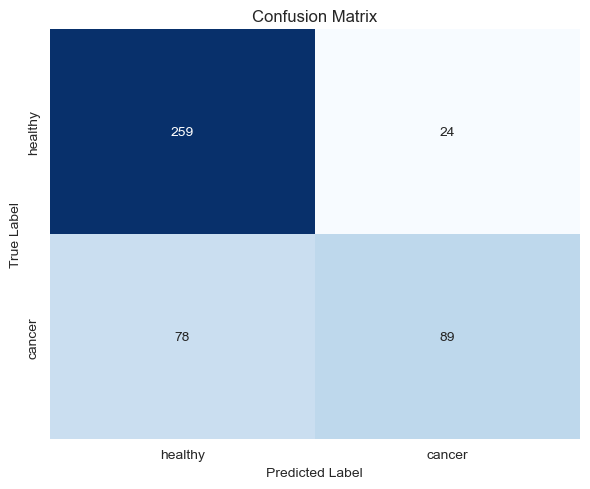

In [24]:
from sklearn.naive_bayes import GaussianNB
datasets = [
    ('Unscaled', X_train, X_test, Y_train, Y_test),
    ('Scaled', X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled),
    ('PCA_3', X_train_pca_3, X_test_pca_3, Y_train, Y_test),
    ('Scaled_PCA_3', X_train_scaled_pca_3, X_test_scaled_pca_3, Y_train_scaled, Y_test_scaled),
    ('PCA_6', X_train_pca_6, X_test_pca_6, Y_train, Y_test),
    ('Scaled_PCA_6', X_train_scaled_pca_6, X_test_scaled_pca_6, Y_train_scaled, Y_test_scaled)
]

for name, X_tr, X_te, Y_tr, Y_te in datasets:
    model = GaussianNB()
    model.fit(X_tr, Y_tr)
    Y_pred = model.predict(X_te)
    print("-----NAIVE BAYES, DATASET: ",name)
    print("\nTEST ACCURACY:", accuracy_score(Y_te, Y_pred))
    print('\nClassification Report:')
    print("\n",classification_report(Y_te, Y_pred))
    print('\nConfusion Matrix:')
    conf_mat = confusion_matrix(Y_te, Y_pred)
    class_names = ['healthy', 'cancer']
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

In [25]:
#Hand-made Naive Bayes
from math import sqrt, pi, exp
class NaiveBayes:
    
    def gaussian(self,x,mean,std):
        if std==0:
            return 1.0 if x==mean else 0.0
        exponent =exp(-((x-mean)**2.0)/(2.0*std**2.0))
        return (1/(sqrt(2.0*pi)*std))*exponent
    
    def summarize_by_class(self,X, y):
        summaries = {}
        for cls in np.unique(y):
            X_cls = X[y == cls]
            means = X_cls.mean(axis=0)
            stds = X_cls.std(axis=0)
            summaries[cls] = list(zip(means, stds))
        return summaries
    
    def calculate_class_probabilities(self,summaries, input_vector, class_priors):
        probabilities = {}
        for cls, feature_summaries in summaries.items():
            prob = class_priors[cls]
            for i in range(len(input_vector)):
                mean, std = feature_summaries[i]
                prob *= self.gaussian(input_vector[i], mean, std)    #P(Xi|Class)
            probabilities[cls] = prob
        return probabilities
    
    def predict(self,summaries, input_vector, class_priors):
        probs = self.calculate_class_probabilities(summaries, input_vector, class_priors)   #dictionary cls: prob
        return max(probs, key=probs.get)
    
    def get_predictions(self, X_train, Y_train, X_test):
        summaries=self.summarize_by_class(X_train, Y_train)
        class_priors = {cls: np.mean(Y_train == cls) for cls in np.unique(Y_train)}
        preds = [self.predict(summaries, row, class_priors) for row in X_test]
        return pd.Series(preds)


-----MY BAYES, DATASET:  Unscaled

TEST ACCURACY: 0.8577777777777778

Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.97      0.90       283
           1       0.93      0.66      0.78       167

    accuracy                           0.86       450
   macro avg       0.88      0.82      0.84       450
weighted avg       0.87      0.86      0.85       450


Confusion Matrix:


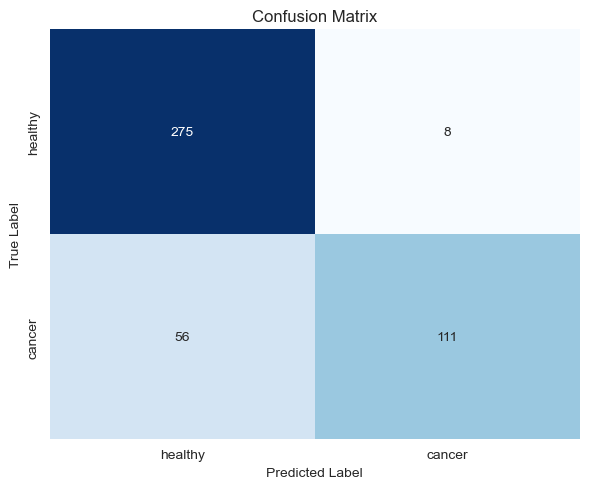

-----MY BAYES, DATASET:  Scaled

TEST ACCURACY: 0.8577777777777778

Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.97      0.90       283
           1       0.93      0.66      0.78       167

    accuracy                           0.86       450
   macro avg       0.88      0.82      0.84       450
weighted avg       0.87      0.86      0.85       450


Confusion Matrix:


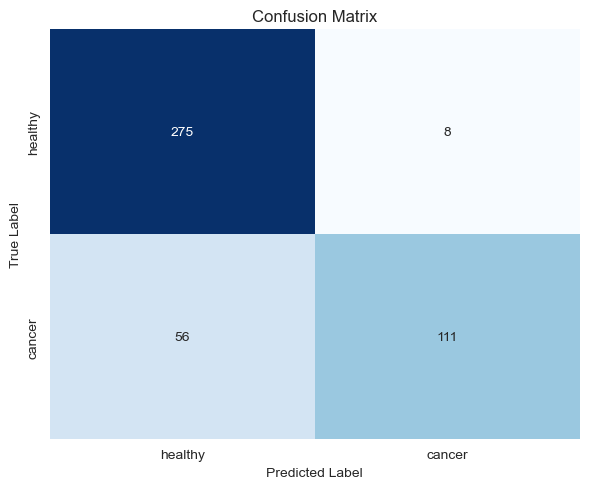

-----MY BAYES, DATASET:  PCA_3

TEST ACCURACY: 0.6622222222222223

Classification Report:

               precision    recall  f1-score   support

           0       0.68      0.88      0.77       283
           1       0.59      0.29      0.39       167

    accuracy                           0.66       450
   macro avg       0.63      0.59      0.58       450
weighted avg       0.65      0.66      0.63       450


Confusion Matrix:


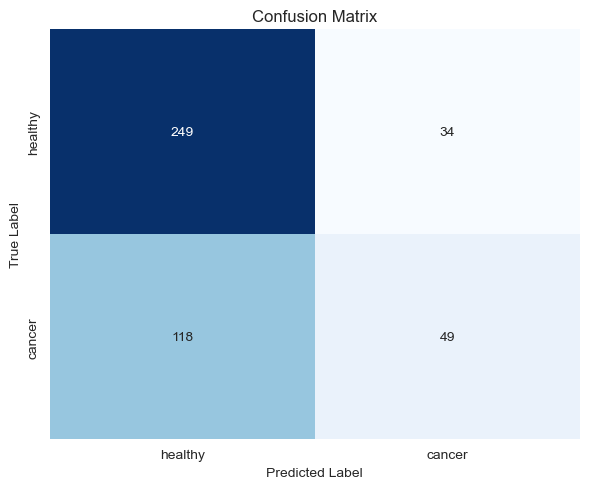

-----MY BAYES, DATASET:  Scaled_PCA_3

TEST ACCURACY: 0.6555555555555556

Classification Report:

               precision    recall  f1-score   support

           0       0.67      0.89      0.76       283
           1       0.58      0.26      0.36       167

    accuracy                           0.66       450
   macro avg       0.63      0.57      0.56       450
weighted avg       0.64      0.66      0.61       450


Confusion Matrix:


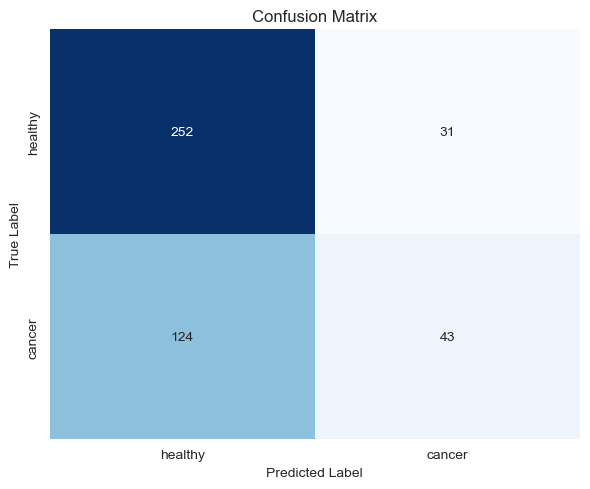

-----MY BAYES, DATASET:  PCA_6

TEST ACCURACY: 0.7688888888888888

Classification Report:

               precision    recall  f1-score   support

           0       0.77      0.91      0.83       283
           1       0.77      0.53      0.63       167

    accuracy                           0.77       450
   macro avg       0.77      0.72      0.73       450
weighted avg       0.77      0.77      0.76       450


Confusion Matrix:


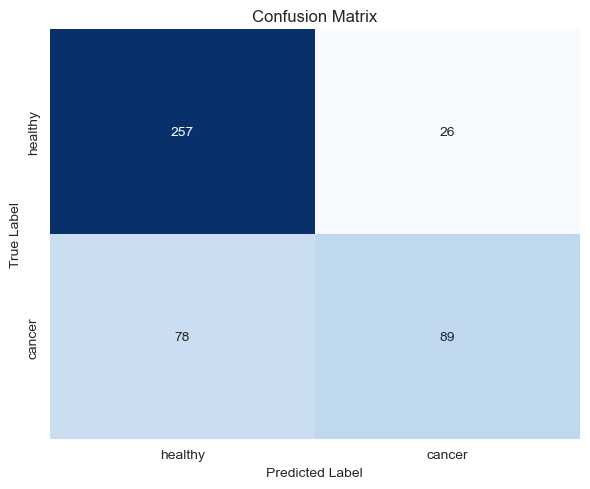

-----MY BAYES, DATASET:  Scaled_PCA_6

TEST ACCURACY: 0.7733333333333333

Classification Report:

               precision    recall  f1-score   support

           0       0.77      0.92      0.84       283
           1       0.79      0.53      0.64       167

    accuracy                           0.77       450
   macro avg       0.78      0.72      0.74       450
weighted avg       0.78      0.77      0.76       450


Confusion Matrix:


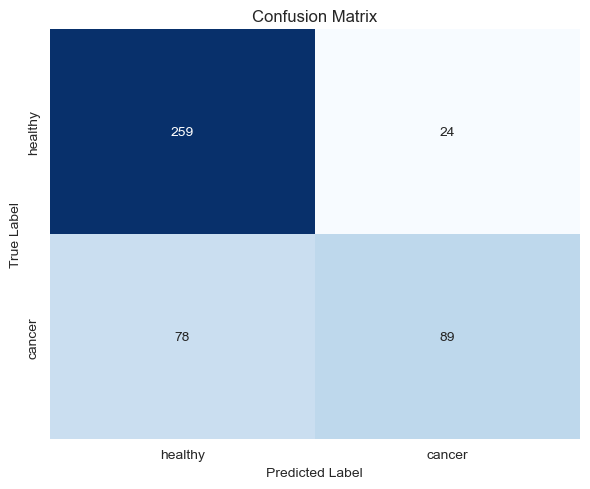

In [26]:
datasets_1 = [
    ('Unscaled', X_train, X_test, Y_train, Y_test),
    ('Scaled', X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled)]    #Dataframes
datasets_2 = [                                                       #Already Numpy
    ('PCA_3', X_train_pca_3, X_test_pca_3, Y_train, Y_test),
    ('Scaled_PCA_3', X_train_scaled_pca_3, X_test_scaled_pca_3, Y_train_scaled, Y_test_scaled),
    ('PCA_6', X_train_pca_6, X_test_pca_6, Y_train, Y_test),
    ('Scaled_PCA_6', X_train_scaled_pca_6, X_test_scaled_pca_6, Y_train_scaled, Y_test_scaled)
]

for name, X_tr, X_te, Y_tr, Y_te in datasets_1:
    my_bayes = NaiveBayes()
    Y_pred_my_NB = my_bayes.get_predictions(X_tr.to_numpy(), Y_tr.to_numpy(), X_te.to_numpy())
    print("-----MY BAYES, DATASET: ",name)
    print("\nTEST ACCURACY:", accuracy_score(Y_te, Y_pred_my_NB))
    print('\nClassification Report:')
    print("\n",classification_report(Y_te, Y_pred_my_NB))
    print('\nConfusion Matrix:')
    conf_mat = confusion_matrix(Y_te, Y_pred_my_NB)
    class_names = ['healthy', 'cancer']
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()
    
for name, X_tr, X_te, Y_tr, Y_te in datasets_2:
    my_bayes = NaiveBayes()
    Y_pred_my_NB = my_bayes.get_predictions(X_tr, Y_tr, X_te)
    print("-----MY BAYES, DATASET: ",name)
    print("\nTEST ACCURACY:", accuracy_score(Y_te, Y_pred_my_NB))
    print('\nClassification Report:')
    print("\n",classification_report(Y_te, Y_pred_my_NB))
    print('\nConfusion Matrix:')
    conf_mat = confusion_matrix(Y_te, Y_pred_my_NB)
    class_names = ['healthy', 'cancer']
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()


-----Decision Tree on Unscaled dataset -----

Best parameters found:  {'criterion': 'entropy', 'min_samples_split': 4}

Best cross-validation accuracy: 0.8514285714285714

TEST ACCURACY: 0.8711111111111111

Classification Report:

               precision    recall  f1-score   support

           0       0.88      0.92      0.90       283
           1       0.85      0.79      0.82       167

    accuracy                           0.87       450
   macro avg       0.87      0.85      0.86       450
weighted avg       0.87      0.87      0.87       450


Confusion Matrix:


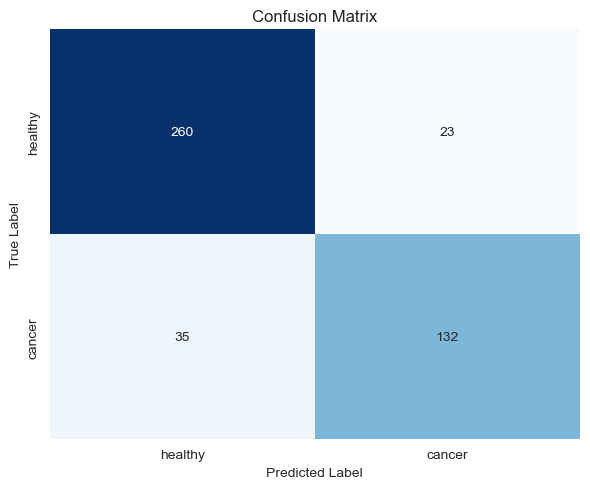


-----Decision Tree on Scaled dataset -----

Best parameters found:  {'criterion': 'entropy', 'min_samples_split': 10}

Best cross-validation accuracy: 0.8504761904761905

TEST ACCURACY: 0.8911111111111111

Classification Report:

               precision    recall  f1-score   support

           0       0.89      0.94      0.92       283
           1       0.89      0.81      0.85       167

    accuracy                           0.89       450
   macro avg       0.89      0.87      0.88       450
weighted avg       0.89      0.89      0.89       450


Confusion Matrix:


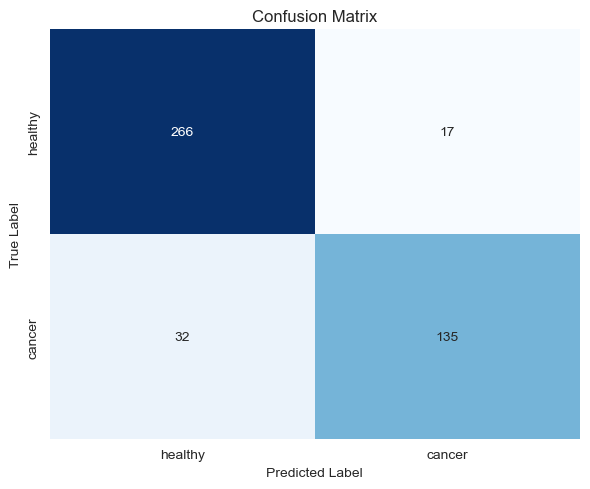


-----Decision Tree on PCA_3 dataset -----

Best parameters found:  {'criterion': 'entropy', 'min_samples_split': 40}

Best cross-validation accuracy: 0.6428571428571429

TEST ACCURACY: 0.6355555555555555

Classification Report:

               precision    recall  f1-score   support

           0       0.69      0.76      0.72       283
           1       0.51      0.42      0.46       167

    accuracy                           0.64       450
   macro avg       0.60      0.59      0.59       450
weighted avg       0.62      0.64      0.63       450


Confusion Matrix:


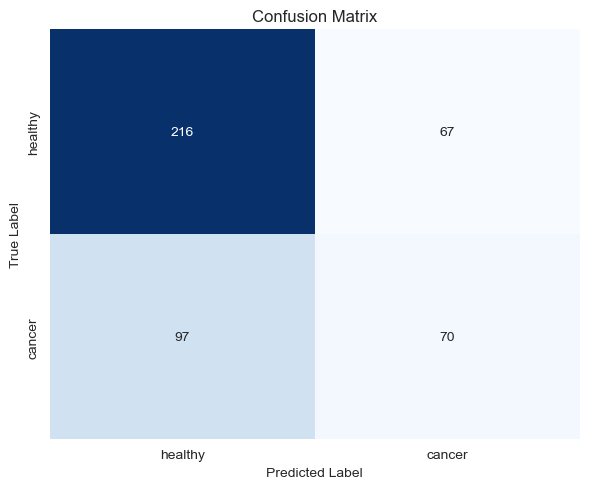


-----Decision Tree on Scaled_PCA_3 dataset -----

Best parameters found:  {'criterion': 'gini', 'min_samples_split': 40}

Best cross-validation accuracy: 0.6314285714285715

TEST ACCURACY: 0.6155555555555555

Classification Report:

               precision    recall  f1-score   support

           0       0.66      0.80      0.72       283
           1       0.47      0.30      0.37       167

    accuracy                           0.62       450
   macro avg       0.57      0.55      0.55       450
weighted avg       0.59      0.62      0.59       450


Confusion Matrix:


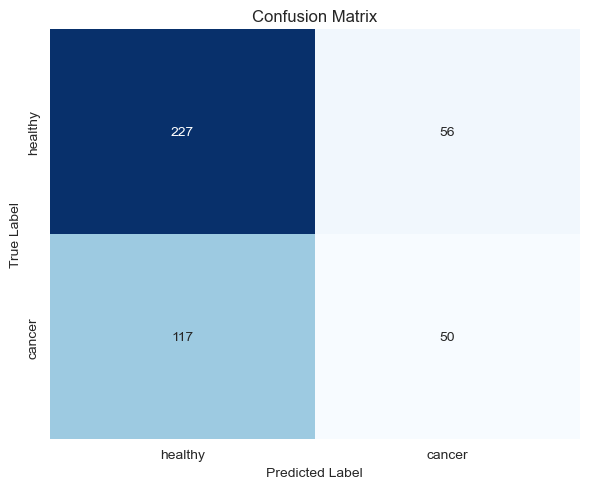


-----Decision Tree on PCA_6 dataset -----

Best parameters found:  {'criterion': 'gini', 'min_samples_split': 40}

Best cross-validation accuracy: 0.7714285714285715

TEST ACCURACY: 0.7755555555555556

Classification Report:

               precision    recall  f1-score   support

           0       0.78      0.89      0.83       283
           1       0.76      0.57      0.66       167

    accuracy                           0.78       450
   macro avg       0.77      0.73      0.74       450
weighted avg       0.77      0.78      0.77       450


Confusion Matrix:


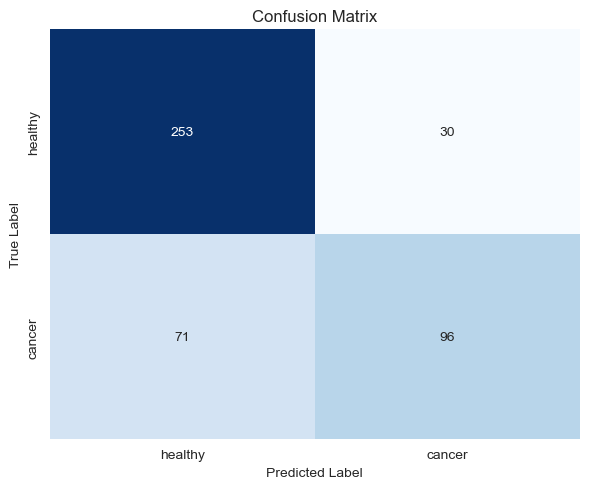


-----Decision Tree on Scaled_PCA_6 dataset -----

Best parameters found:  {'criterion': 'gini', 'min_samples_split': 10}

Best cross-validation accuracy: 0.7323809523809525

TEST ACCURACY: 0.7666666666666667

Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.83      0.82       283
           1       0.69      0.66      0.68       167

    accuracy                           0.77       450
   macro avg       0.75      0.75      0.75       450
weighted avg       0.76      0.77      0.77       450


Confusion Matrix:


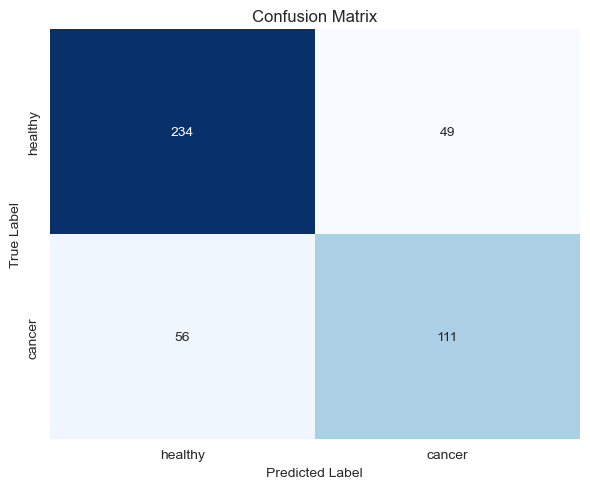

In [27]:
from sklearn.tree import DecisionTreeClassifier

datasets = [
    ('Unscaled', X_train, X_test, Y_train, Y_test),
    ('Scaled', X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled),
    ('PCA_3', X_train_pca_3, X_test_pca_3, Y_train, Y_test),
    ('Scaled_PCA_3', X_train_scaled_pca_3, X_test_scaled_pca_3, Y_train_scaled, Y_test_scaled),
    ('PCA_6', X_train_pca_6, X_test_pca_6, Y_train, Y_test),
    ('Scaled_PCA_6', X_train_scaled_pca_6, X_test_scaled_pca_6, Y_train_scaled, Y_test_scaled)
]
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [3,4,6,7,10,40]
}
for name, X_tr, X_te, Y_tr, Y_te in datasets:
    grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_tr, Y_tr)
    
    print(f'\n-----Decision Tree on {name} dataset -----\n')
    print("Best parameters found: ", grid_search.best_params_)
    print("\nBest cross-validation accuracy:", grid_search.best_score_) 
    
    best_tree = grid_search.best_estimator_
    Y_pred = best_tree.predict(X_te)
    
    print("\nTEST ACCURACY:", accuracy_score(Y_te, Y_pred))
    print('\nClassification Report:')
    print("\n",classification_report(Y_te, Y_pred))
    print('\nConfusion Matrix:')
    conf_mat = confusion_matrix(Y_te, Y_pred)
    class_names = ['healthy', 'cancer']
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

In [28]:
#The best parameters for scaled data -> Decision tree: criterion: 'entropy', min_samples_split: 10, rec for cancer 0,81 , acc 0,89 